In [1]:
# ============ importar librerias a usar ============
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix

## 1.FUNCIONES DE ACTIVACION

In [2]:
def escalon(x):
  if x > 0:
    return 1
  else:
    return 0

In [3]:
def sigmoide(x):
  # para que salga exactamente 0 o exactamente 1
  if x<=-10:
    return 0
  elif x >= 10:
    return 1
  else:
    return 1/(1+np.exp(-x))

In [4]:
escalon_vec = np.vectorize(escalon)
sigmoide_vec = np.vectorize(sigmoide)

# 2.RNA PERCEPTRON

In [5]:
# creando la neurona
def neurona(entradaX, pesosW1, biasB1, funcion="escalon"):
  # capa 1
  entrada_neta = np.dot(pesosW1,entradaX) + biasB1 # Z = W*X + b
  if funcion == "escalon":
    salida_C1 = escalon_vec(entrada_neta)  # f(Z)
  else:
    salida_C1 = sigmoide_vec(entrada_neta)
  return salida_C1[0] #salida

In [7]:
def ajuste_perceptron(entradas, salidas, coef_aprendizaje, pesos, bias):
  for entrada, salida_deseada in zip(entradas,salidas):
    salida_obtenida = neurona(entrada, pesos, bias)
    error =  salida_deseada - salida_obtenida
    if error != 0: # ajustando pesos
      pesos += coef_aprendizaje*error*entrada
      bias += coef_aprendizaje*error*(1) # se pone -1 si el bias de la neurona es -bias para positivizarlos
  return pesos, bias # retorna  pesos y bias parciales


In [8]:
# perceptron fit
def entrenar_perceptron(entradas, salidas, coef_aprendizaje, epocas):
  n=len(entradas[0])
  pesos = np.array(2*np.random.rand(1,n)-1) # 9 entradas 1 neurona
  bias = 2*np.random.rand(1)-1
  for iter in range(epocas): # buscar pesos, bias
    pesos, bias = ajuste_perceptron(entradas, salidas, coef_aprendizaje, pesos, bias)
  return pesos, bias #retorna pesos y bias optimo


# 3.LECTURA DE DATOS

In [9]:
df = pd.read_csv("persona.csv")
df.head()

,edad,peso,altura,muneca,biceps,sexo
0,43,87.3,188.0,12.2,35.8,Hombre
1,65,80.0,174.0,12.0,35.0,Hombre
2,45,82.3,176.5,11.2,38.5,Hombre
3,37,73.6,180.3,11.2,32.2,Hombre
4,55,74.1,167.6,11.8,32.9,Hombre


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   edad    36 non-null     int64  
 1   peso    36 non-null     float64
 2   altura  36 non-null     float64
 3   muneca  36 non-null     float64
 4   biceps  36 non-null     float64
 5   sexo    36 non-null     int64  
dtypes: float64(4), int64(2)
memory usage: 1.8 KB


In [14]:
df.describe()

,edad,peso,altura,muneca,biceps,sexo
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,31.444444,68.952778,171.555556,10.466667,31.166667,0.500000
std,10.554469,14.868999,10.520170,1.175463,5.234392,0.507093
min,19.000000,42.000000,147.200000,8.300000,23.500000,0.000000
25%,24.750000,54.950000,164.800000,9.475000,25.975000,0.000000
50%,28.000000,71.500000,172.700000,10.650000,32.150000,0.500000
75%,37.000000,82.400000,179.400000,11.500000,35.050000,1.000000
max,65.000000,98.200000,190.500000,12.400000,40.400000,1.000000


# 4.ANALISIS EXPLORATORIO DE DATOS

In [11]:
df["sexo"].unique()

array(['Hombre', 'Mujer'], dtype=object)

In [12]:
# convirtiendo a 1 y 0
df["sexo"].replace({'Mujer': 0, 'Hombre': 1}, inplace=True)

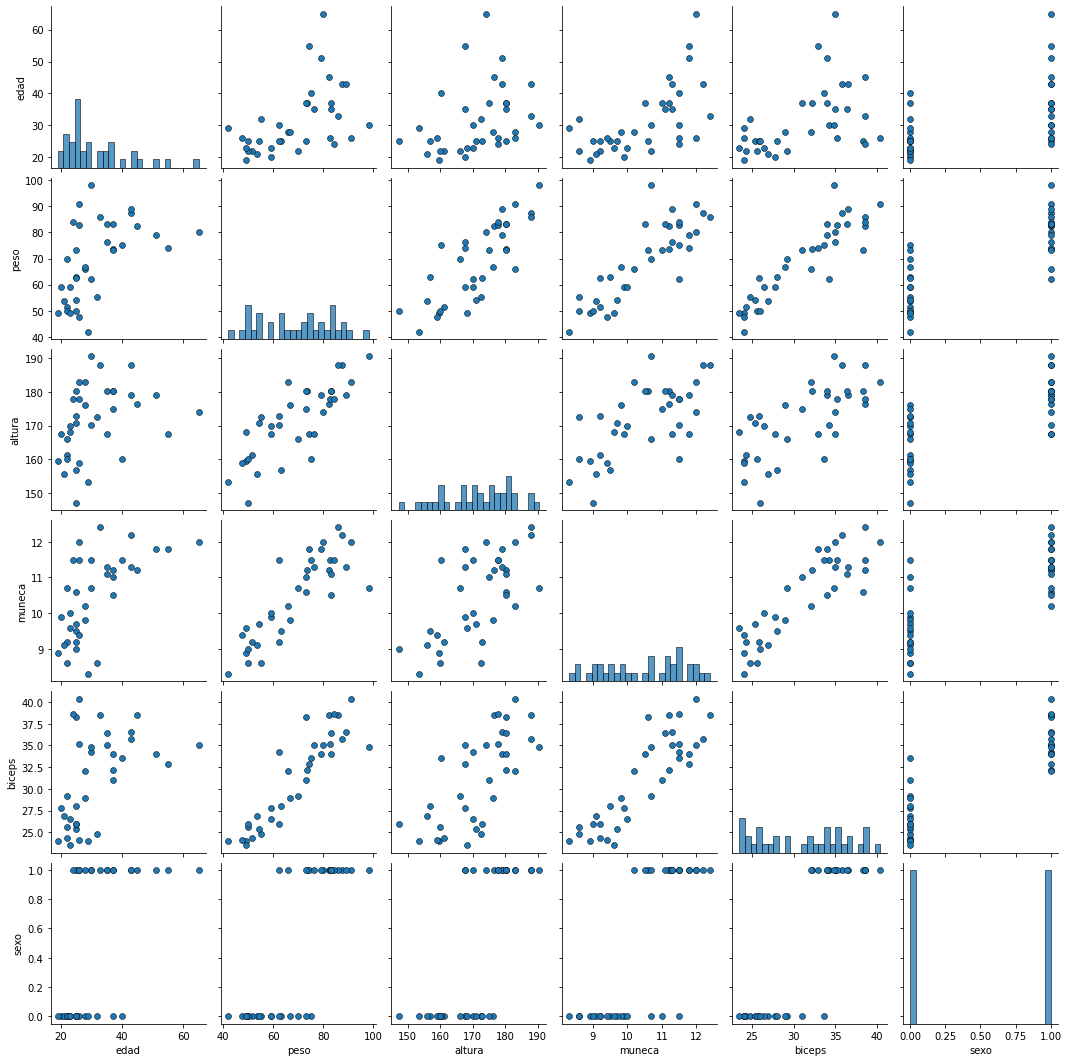

In [15]:
#matriz de scatterplots(gráficos de dispersión)
sns.pairplot(data=df[df.columns[0:6]], diag_kws={'edgecolor':'k', 'bins':25}, plot_kws={'edgecolor':'k'})
plt.show()

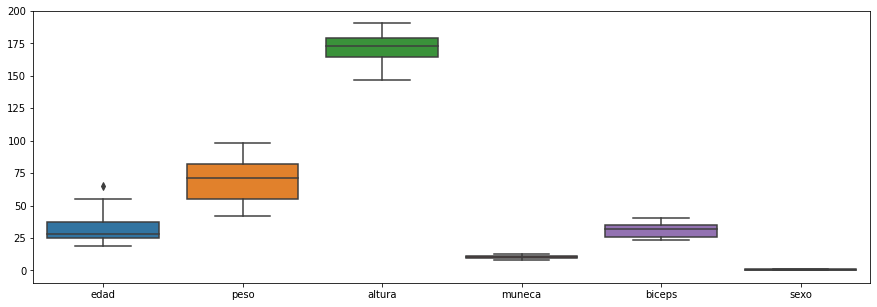

In [16]:
plt.figure(figsize = [15, 5]) 
sns.boxplot(data = df);

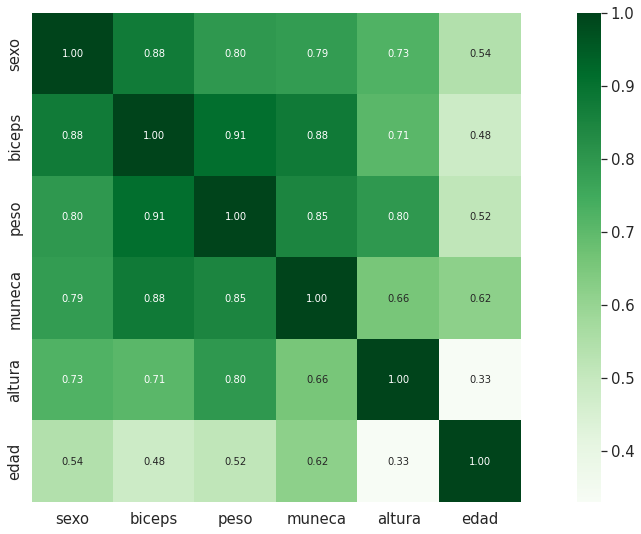

In [18]:
corr = df.corr()
plt.figure(figsize=(20, 9))
columnas = corr.nlargest(12 , 'sexo')['sexo'].index
cm = np.corrcoef(df[columnas].values.T)
sns.set(font_scale=1.35)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=columnas.values, xticklabels=columnas.values,cmap="Greens")
plt.show()

# 5.NORMALIZACION DE DATOS

In [19]:
X = df.drop("sexo", axis=1)
Y = df["sexo"]

scaler = preprocessing.StandardScaler()
scaler.fit(X)
# =========== TRANSFORMANDO =========== 
X = scaler.transform(X)

# 6.SEPARACION DE DATOS

In [21]:
# =========== SEPARACION DE DATOS =========== 
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.4,random_state=42)

In [22]:
print("Tamaño del conjunto de entrenamiento", X_train.shape)
print("Tamaño del conjunto de prueba", X_test.shape)

Tamaño del conjunto de entrenamiento (21, 5)
Tamaño del conjunto de prueba (15, 5)


# 7.ENTRENAMIENTO

In [23]:
# modulo FIT
def fit_perceptron(entradas,salidas,coef_aprendizaje,epocas):
  pesos, bias = entrenar_perceptron(entradas, salidas, coef_aprendizaje, epocas)
  return pesos, bias

In [24]:
# FIT
pesos,bias = fit_perceptron(X_train,y_train, 0.2, 100)
print(pesos,bias)

[[-0.42882618 -0.46069478  1.11402472  0.86562451  0.85927925]] [0.01241495]


# 8.TEST RNA

In [25]:
def perceptron_predict(entradas):
  y_pred = []
  for entrada in entradas:
    y_pred.append(neurona(entrada,pesos,bias))
  return y_pred

In [26]:
y_pred=perceptron_predict(X_test)

In [27]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=["Predict-YES", "Predict-NO"], index=["YES","NO"])

,Predict-YES,Predict-NO
YES,6,1
NO,1,7


# 9.METRICAS

In [28]:
print(classification_report(y_test,y_pred ))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.88      0.88      0.88         8

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15



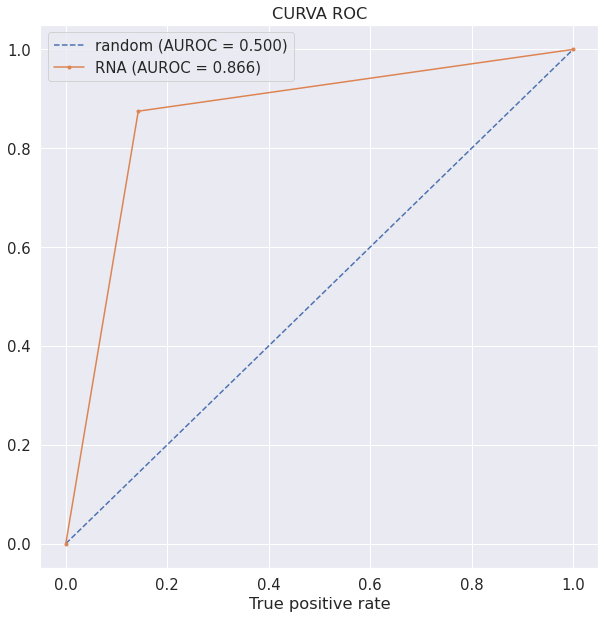

In [29]:
# Curva de ROC
from sklearn.metrics import roc_curve, roc_auc_score
models_probabilities=[]
models_probabilities.append(y_pred)

models_probs = []
models_fpr_tpr = []
for y_pred in models_probabilities:
  # Calculando auc score
  auc = roc_auc_score(y_test, y_pred)
  models_probs.append(auc)
  # Calculando la curva de ROC -> fpr,tpr
  model_fpr, model_tpr, _ = roc_curve(y_test, y_pred)
  models_fpr_tpr.append((model_fpr, model_tpr))

r_probs = [0 for _ in range(len(y_test))] # probabilidad de referencia base
models_probs.append(roc_auc_score(y_test, r_probs))
model_fpr_, model_tpr_, _ = roc_curve(y_test, r_probs)
models_fpr_tpr.append((model_fpr_, model_tpr_))

# graficando CURVA ROC

auc_RNA = models_probs[0]
auc_r = models_probs[1]

RNA_fpr, RNA_tpr = models_fpr_tpr[0]
r_fpr, r_tpr = models_fpr_tpr[1]

plt.figure(figsize=(10,10))

plt.plot(r_fpr, r_tpr,linestyle='--', label="random (AUROC = %0.3f)" % auc_r)
plt.plot(RNA_fpr, RNA_tpr,marker='.', label="RNA (AUROC = %0.3f)" % auc_RNA)

plt.title("CURVA ROC")
plt.xlabel("False positive rate")
plt.xlabel("True positive rate")

plt.legend()
plt.show()

# 10.SALVAR Y RECUPERAR VALORES(peso, bias) DEL MODELO DE RNA ENTRENADO

In [30]:
file_values = open("persona.txt","w")
for peso in pesos[0]:
  file_values.writelines(f"{peso}\n")
#file_values.writelines(f"{pesos[0]}")
file_values.write(f"{bias[0]}")
file_values.close()

In [31]:
# RECUPERAR VALORES DEL MODELO DE RNA

with open("persona.txt") as file_object:
  contents = file_object.readlines()
  
# extraer los datos en una lista  
values_saved = []
for value in contents:
  values_saved.append(float(value.rstrip('\n')))

In [32]:
weight_saved = np.array([values_saved[0:-1]])
bias_saved = values_saved[-1]

# 11.PREDICCION

In [33]:
def predecir(entrada,pesos,bias):
  return neurona(entrada,pesos,bias)

In [34]:
df.columns

Index(['edad', 'peso', 'altura', 'muneca', 'biceps', 'sexo'], dtype='object')

In [35]:
def leer_datos():
  features = ['edad', 'peso', 'altura', 'muneca', 'biceps']
  data_input = []
  for feature in features:
    value = float(input(f"insert value of {feature}: "))
    data_input.append(value)
  return data_input

In [36]:
entrada = leer_datos()

insert value of edad: 19
insert value of peso: 48
insert value of altura: 165
insert value of muneca: 9
insert value of biceps: 29


In [37]:
entrada_df = np.array([entrada]) # convertir a array de numpy y lista de listas
# NORMALIZANDO LOS DATOS DE ENTRADA
entrada_df = scaler.transform(entrada_df)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [38]:
result = predecir(entrada_df[0],weight_saved,bias_saved)
if result == 1:
  print("varon")
else:
  print("mujer")

mujer
